# The most advanced case

Bounding box built-in as 4th channel
Augmentation
Resnet18 customized for 4 channels and 40 classes

In [1]:
import os
import torch

from ImageFolderWithBBox import ImageFolderWithBBox

import my_paths

from my_sysinfo import get_device

import my_transforms

import my_models

from my_train_model import training_loop

from my_test_model import test_model

In [2]:
BATCH_SIZE = 128
NUM_WORKERS = 2

In [3]:
# no customized transforms as our custom dataset already does the job
def validate_model(model_id, make_model, train_data_path, test_data_path, loops):
    SAVED_MODEL_PATH = os.path.join(my_paths.models, model_id + '.pth')
    device = get_device()
    model = make_model(device)

    if os.path.exists(SAVED_MODEL_PATH):
        model.load_state_dict(torch.load(SAVED_MODEL_PATH))
    else:
        train_dataset = ImageFolderWithBBox(train_data_path, augment=True)
        train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
        training_loop(loops, model, train_data_loader, device)
        torch.save(model.state_dict(), SAVED_MODEL_PATH)

    test_dataset = ImageFolderWithBBox(test_data_path, augment=False)
    test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    
    test_model(model, test_data_loader, device)

## Resnet18 4-channel bounding-box augmented images random split

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda


c:\Users\lootman\anaconda3\envs\avpr\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lootman\anaconda3\envs\avpr\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 started.
loss: 3.836693  [  128/ 7668]
loss: 3.068921  [  768/ 7668]
loss: 2.795178  [ 1408/ 7668]
loss: 2.619992  [ 2048/ 7668]
loss: 2.544331  [ 2688/ 7668]
loss: 2.480931  [ 3328/ 7668]
loss: 2.402618  [ 3968/ 7668]
loss: 2.632138  [ 4608/ 7668]
loss: 2.026563  [ 5248/ 7668]
loss: 2.066856  [ 5888/ 7668]
loss: 2.244158  [ 6528/ 7668]
loss: 2.053440  [ 7168/ 7668]
Epoch 1 completed. Loss: 2.21708607673645
Epoch 2 started.
loss: 1.699283  [  128/ 7668]
loss: 1.876397  [  768/ 7668]
loss: 1.775297  [ 1408/ 7668]
loss: 1.827170  [ 2048/ 7668]
loss: 1.859219  [ 2688/ 7668]
loss: 1.800014  [ 3328/ 7668]
loss: 1.898772  [ 3968/ 7668]
loss: 1.982364  [ 4608/ 7668]
loss: 1.770917  [ 5248/ 7668]
loss: 1.778414  [ 5888/ 7668]
loss: 1.695450  [ 6528/ 7668]
loss: 2.163999  [ 7168/ 7668]
Epoch 2 completed. Loss: 1.7457901239395142
Epoch 3 started.
loss: 1.451975  [  128/ 7668]
loss: 1.469780  [  768/ 7668]
loss: 1.812562  [ 1408/ 7668]
loss: 1.612498  [ 2048/ 7668]
loss: 1.540290  [ 2688/

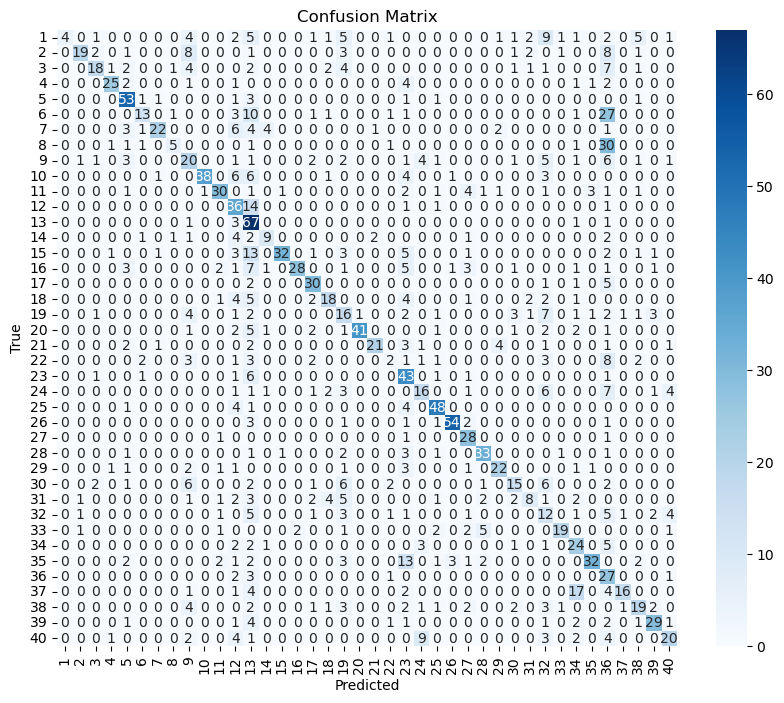

In [4]:
validate_model(
    'resnet-random-bbox-augmented',
    my_models.resnet4ch.make_model,
    my_paths.random_splits_train,
    my_paths.random_splits_test,
    20
)